# Изучение рынка электронных игр для увеличения их продаж

Для интернет-магазина, который продаёт по всему миру компьютерные игры, из открытых данных о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

# Содержание

[1 Ознакомление и изучение общей информации](#1)

- [1.1 Вывод](#11)

[2 Предобработка данных](#2)

- [2.1  Замена названия столбцов и типов данных](#21)

- [2.2  Обработка пропусков](#22)

- [2.3  Замена значений](#23)

- [2.4  Создание столбца с суммарными продажами](#24)

- [2.5 Вывод](#25)

[3  Исследовательский анализ данных](#3)

- [3.1  Оценка количества выпущенных игр в разные годы](#31)

- [3.2  Поиск лидеров по продажам и потенциально прибыльных платформ](#32)

- [3.3  Оценка глобальных продаж актуалных платформ и влияния на них рейтингов критиков и пользователей](#33)

- [3.4  Оценка продаж игр в зависимости от их жанра](#34)

- [3.5 Вывод](#35)

[4  Составление портрета пользователя каждого региона](#4)

- [4.1  Самые популярные платформы](#41)

- [4.2  Самые популярные жанры](#42)

- [4.3  Влияние рейтинга ESRB на продажи в регионах](#43)

- [4.4  Вывод](#44)

[5  Проверка гипотез](#5)

- [5.1  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#51)

- [5.2  Средние пользовательские рейтинги жанров Action и Sports разные](#52)

[6 Общий вывод](#6)

<a id='1'></a>
## Ознакомление и изучение общей информации

In [1]:
import pandas as pd
import numpy as np 
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st


df = pd.read_csv("/datasets/games.csv")

In [2]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [5]:
df[df['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В 2-х строках с пропуском Name, пропущены как значения Genre, так и их рейтинги. На следующем этапе их удалим.


In [6]:
df['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [7]:
df['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [8]:
df['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


<a id='11'></a>
### Вывод

Выбивающихся значений не обнаружено, на этапе предобработки данных необходимо:

- названия столбцов привести к нижнему регистру
- преобразовать данные в целочисленный тип в столбцах: Year_of_Release, Critic_Score, т.к. точность от этого они не потеряют.
- обработать в User_Score значения 'tbd', тогда колонка преобразуется в тип float. После чего их возможно нормализовать по отношению к Critic_Score (помножив колонку на 10) и так же перевести в целочисленный тип.  
- переименовать в колонке Rating значения K-A в E, т.к. это одно и то же. 
- обработать пропуски, при этом 2 строки с пропуском в колонке Name можно удалить, т.к. в них пропущены большинство других значений.
- дупликатов не обнаружено.

<a id='2'></a>
## Предобработка данных

<a id='21'></a>
### Замена названия столбцов и типов данных

In [11]:
df.columns=df.columns.str.lower()
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['critic_score'] = df['critic_score'].astype('Int64')
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<a id='22'></a>
### Обработка пропусков

In [12]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
df = df[~df['name'].isna()]
df = df[~df['year_of_release'].isna()]
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [14]:
df[((df['critic_score'].isna()) & (df['user_score'].isna()) & (df['rating'].isna()))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Видим, что пропуски в 3-х столбцах с рейтингом игр составляют около 50% всех данных, причем пропуски во многом пересекаются.
Рейтинг ESRB основан в 1994, соответсвенно их пропуски в rating можно было бы объяснить отсутсвием рейтингов в ранних годах. Однако в таблице видны самые разные года, включая совсем недавние. Вероятно, они образовались при неправильной выгрузки информации из базы данных.
Удалить такое большое кол-во строк мы себе позволить не можем, но и найти логичное значение для их заполнения (например средним значением) также не возможно. Это непременно исказит результат исследования. Просто оставим как есть.

<a id='23'></a>
### Замена значений

In [15]:
df[df['user_score']=="tbd"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Из гугла: tbd - всё, что требует конкретного ответа, которого вы ещё не знаете. По смыслу можно заменить эти значения на NaN. А значения NaN в свою очередь переведем в категорию «RP» («Rating Pending») — «Рейтинг ожидается», так мы сможем охватить для  анализа большее количество игр.

«E» («Everyone») — «Для всех» ( первоначально "K-A" ("Kids to Adults")), т.е. заменим K-A на Е.

In [16]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
df['rating'] = df['rating'].fillna('RP')
df['rating'] = df['rating'].replace('K-A', 'E')
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

In [17]:
df['rating'].value_counts()

RP      6677
E       3924
T       2905
M       1536
E10+    1393
EC         8
AO         1
Name: rating, dtype: int64

In [18]:
# нормализуем user_scor по отношению к Critic_Score (помножив колонку на 10) и так же передем в целочисленный тип
df['user_score'] = (df['user_score'].astype('float64') * 10).astype('Int64') 
df['user_score'].head()

0     80
1    NaN
2     83
3     80
4    NaN
Name: user_score, dtype: Int64

<a id='24'></a>
### Создание  столбца с суммарными продажами 

In [19]:
df["total_sales"] = df["na_sales"] + df["eu_sales"] + df["jp_sales"] + df["other_sales"]
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,80,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,RP,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,RP,0.01


<a id='25'></a>
### Вывод
- названия столбцов привели к нижнему регистру
- заменили в user_score значения 'tbd' на NaN и нормализовали его по отношению к critic_Score
- преобразовали данные в целочисленный тип в столбцах: year_of_Release, critic_Score, user_Score
- переименовали в колонке rating значения K-A в E
- обработали пропуски, удалив при этом строки с пропуском в колонках name и year_of_release, что в сумме менее 2% данных
- создали столбец total_sales с суммарными продажами во всех регионах

<a id='3'></a>
## Исследовательский анализ данных

<a id='31'></a>
### Оценка количества выпущенных игр в разные годы

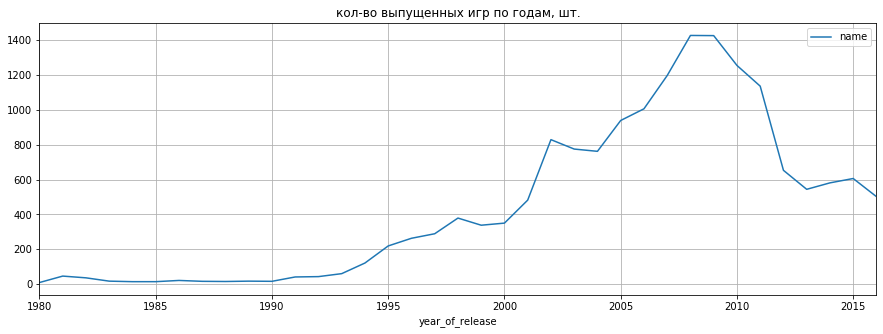

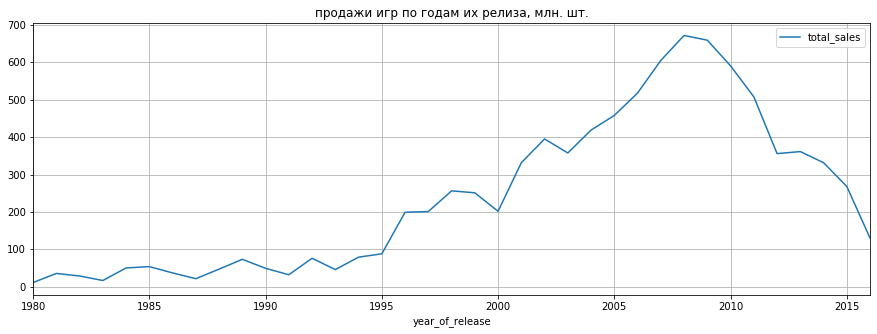

In [20]:
df.pivot_table(index="year_of_release", values="name", aggfunc='count').plot(grid=True, figsize=(15, 5), title="кол-во выпущенных игр по годам, шт.")
df.pivot_table(index="year_of_release", values="total_sales", aggfunc='sum').plot(grid=True, figsize=(15, 5), title="продажи игр по годам их релиза, млн. шт.")
plt.show()

С роста выпусков игр в 90-х годах их кол-во достигло максимума в 2008 году, после чего наступает спад, который возможно связан с новыми альтернативными видами игр (мобильные и онлайн игры). Также видна сильная прямая кореляция продаж игр от кол-ва выпущенных игр.

<a id='32'></a>
### Поиск лидеров по продажам и потенциально прибыльных платформ.

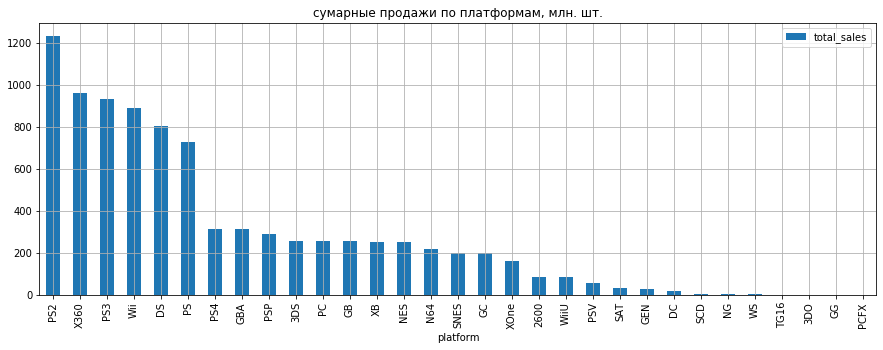

In [21]:
df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).plot(kind="bar", grid=True, figsize=(15, 5), title="сумарные продажи по платформам, млн. шт.");


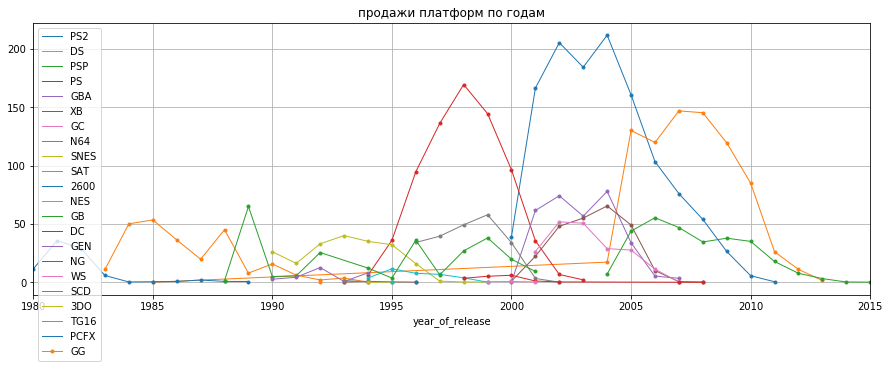

In [22]:
# исключим из общего списка ныне существующие (!=2016)
pl_2016 = df[df['year_of_release'] == 2016]['platform'].value_counts().index.tolist()
pls = df['platform'].value_counts().index.tolist()
pl_before_2016_list = []
for p in pls:
    if p not in pl_2016:
        pl_before_2016_list.append(p)

for platform in pl_before_2016_list:
    pl = df[df["platform"] == platform]
    pl.groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', grid=True,
        style='.-', kind='line', legend=" ", linewidth=1, label=platform, figsize=(15,5), title="продажи платформ по годам")

In [23]:
# срок существования платформ (!=2016)
pl_before_2016 = df[(df['platform'].isin(pl_before_2016_list))]
pl = pl_before_2016.groupby('platform')['year_of_release'].max() - pl_before_2016.groupby('platform')['year_of_release'].min()
pl.describe()

count    22.000000
mean      7.000000
std       6.256425
min       0.000000
25%       2.250000
50%       6.500000
75%       9.750000
max      28.000000
Name: year_of_release, dtype: float64

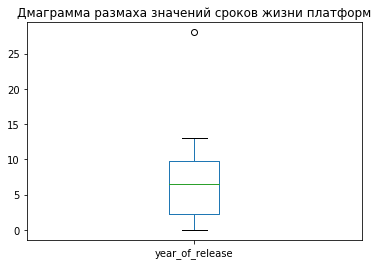

In [24]:
pl.plot.box(title="Дмаграмма размаха значений сроков жизни платформ");

В среднем платформы существуют около 7 лет, по верхнней квартили можно сказать, что мало платформ просуществовало более 10 лет, один из них указан в качестве выброса со сроком в 28 лет - DS. 

Определим срок сущствования у популярных платформ. 
В качестве самых популярных платформ за все время выделим первые 6: PS2, X360, PS3, Wii, DS, PS.

Оценим период их жизни.

PS2 сущетвовал 11 лет
X360 сущетвовал 11 лет
PS3 сущетвовал 10 лет
Wii сущетвовал 10 лет
DS сущетвовал 28 лет
PS сущетвовал 9 лет


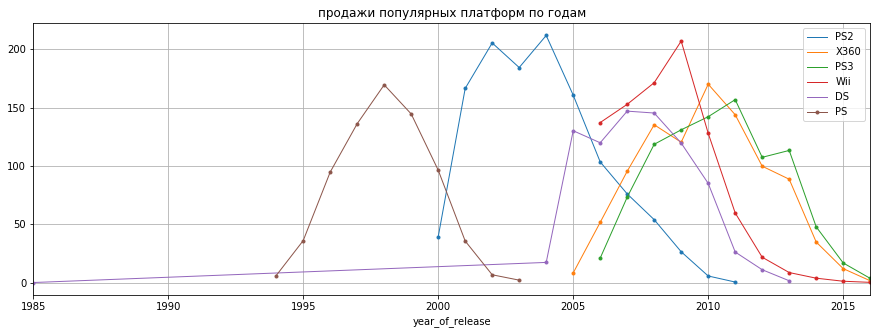

In [25]:
platforms = ["PS2", "X360", "PS3", "Wii", "DS", "PS"]
s = 0
for platform in platforms:
    pl = df[df["platform"] == platform]
    y = pl['year_of_release'].max() - pl['year_of_release'].min()
    print(platform, "сущетвовал", y, "лет")
    pl.groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', grid=True,
        style='.-', kind='line', legend=" ", linewidth=1, label=platform, figsize=(15,5), title="продажи популярных платформ по годам")

Популярные платформы остаются на рынке около 10 лет, за исключением DS, который просуществовал 28 лет, причем обычно примерно через 5 лет после их выхода наблюдается спад в продажах.

Определим актуальные на текущий момент платформы, однако критерием актуальности выберем не их суммарные продажи за последние годы, а кол-во выпущенных релизов за последние 3 года.   

In [26]:
# кол-во выпущенных релизов за последние 3 года
df[df['year_of_release'] >= 2014]['platform'].value_counts()

PS4     376
PSV     295
XOne    228
PS3     219
3DS     212
PC      151
X360    111
WiiU     73
PSP      13
Wii      11
Name: platform, dtype: int64

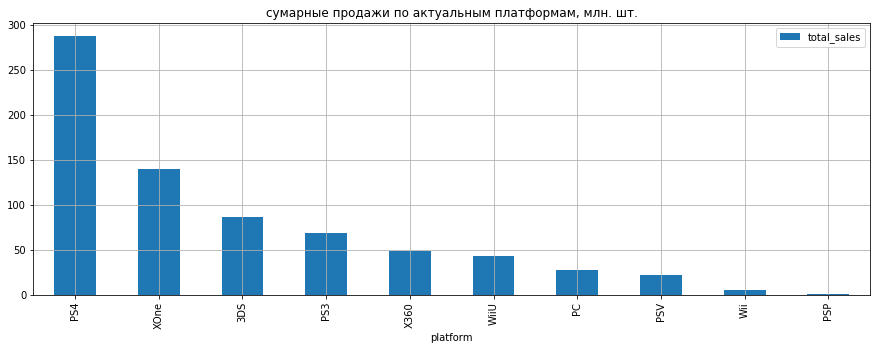

In [27]:
# сумма продаж игр вышедших за последние 3 года
df[df['year_of_release'] >= 2014].pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).plot(kind="bar", grid=True, figsize=(15, 5), title="сумарные продажи по актуальным платформам, млн. шт.");

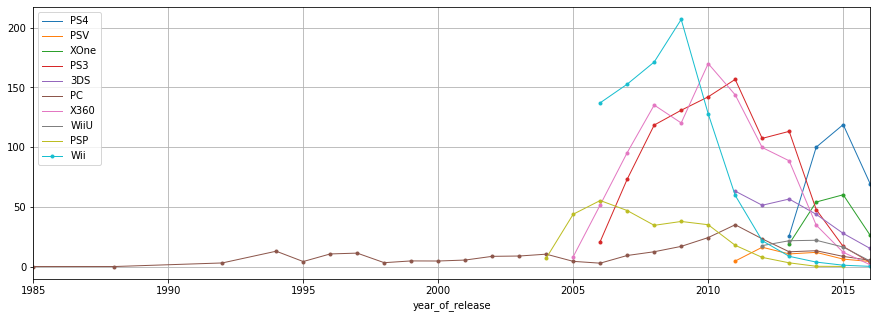

In [28]:
actual_platforms = df[df['year_of_release'] >= 2014]['platform'].value_counts().index.tolist()
for platform in actual_platforms:
    pl = df[df["platform"] == platform]
    pl.groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', grid=True,
                                                                    style='.-', kind='line', legend=" ",
                                                                    linewidth=1, label=platform, figsize=(15,5))

In [29]:
for platform in actual_platforms:
    pl = df[df["platform"] == platform]
    if pl[pl['year_of_release'] == 2015]['total_sales'].sum() > pl[pl['year_of_release'] == 2014]['total_sales'].sum():
        print(platform, "- выручка от игр релиза 2015 > 2014")
    if pl[pl['year_of_release'] == 2016]['total_sales'].sum() > pl[pl['year_of_release'] == 2015]['total_sales'].sum():
        print(platform, "- выручка от игр релиза 2016 > 2015")


PS4 - выручка от игр релиза 2015 > 2014
XOne - выручка от игр релиза 2015 > 2014


Проверили наличие платформ с релизом игр в 2016 году показавших рост продаж относительно 2015. Увы, таких не нашлось. 

Однако платформы PS4 и XOne показали такой рост годом ранее и в целом, исходя из вышеприведенного графика показывают себя как наиболее потенциально прибыльные платформы. Учитывая, что их первый релиз пришелся на 2013 год, то видимо до примерно 2018 года их ждет рост продаж. При этом эти же платформы уже являются лидерами продаж в 2016 году! 

Наибольшее падение продаж в последние годы показывают PS3 и X360. Являсь предшественниками ныне популярных платформ, их 10-летний цикл существования видимо подходит к концу.

В качестве актуальных платформ для дальнейшего анализа определим 3 наиболее популярных и PC, как наиболее живучую и  сегодня не потерявший актуальность, при этом ограничим сроком релиза за последние 5 лет (средник срок роста платформ).

<a id='33'></a>
### Оценка глобальных продаж актуалных платформ и влияния на них рейтингов критиков и пользователей

In [30]:
ap = ['PS4','XOne',"3DS",'PC']
df_ap = df[(df['platform'].isin(ap)) & (df['year_of_release'] > 2010)]
df_ap.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,RP,14.60
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85,82,E,12.65
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,83,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,RP,11.68


In [31]:
df_ap.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,876.000000,917.000000,1540.000000
mean,2013.881818,0.204149,0.201721,0.075922,0.056487,72.304795,66.233370,0.538279
std,1.767972,0.518045,0.522587,0.315946,0.152541,12.344652,14.969841,1.274604
min,2011.000000,0.000000,0.000000,0.000000,0.000000,19.000000,14.000000,0.010000
25%,2012.000000,0.000000,0.000000,0.000000,0.000000,65.000000,58.000000,0.040000
50%,2014.000000,0.040000,0.040000,0.000000,0.010000,74.000000,69.000000,0.130000
75%,2015.000000,0.160000,0.150000,0.040000,0.040000,81.000000,78.000000,0.432500
max,2016.000000,6.030000,6.310000,4.390000,2.380000,97.000000,93.000000,14.630000


Text(0, 0.5, 'Глобальные продажи')

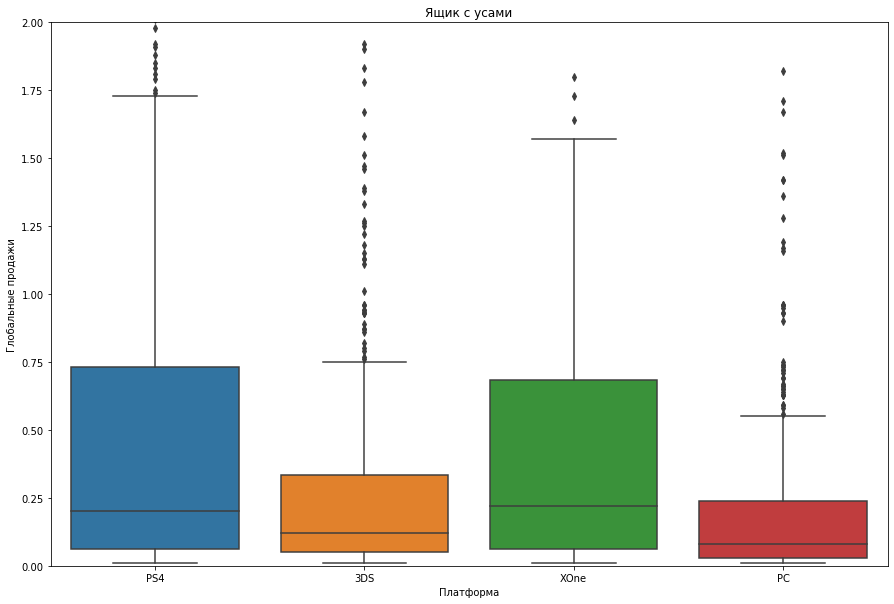

In [32]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(data=df_ap, x='platform', y='total_sales')
ax.set_title('Ящик с усами')
ax.set_xlabel('Платформа')
ax.set_ylim([0, 2])
ax.set_ylabel('Глобальные продажи')

На боксплоте видно, медиана на всех платформах распологается в нижней части межквартильного интервала. Это говорит о наличии выбросов в виде удачных игр с большими суммами продаж, но также и большом количестве посредственных игр в плане продаж. 
Продажи на платформах PS4 и XOne очень похожи, большинство их продаж находятся в диапазоне до 1.5 млн, 3DS и PC отстают от них примерно в 2 раза. Это же подтверждают значения медиан в продажах платформ, т.е. в целом можно сказать, что продажи на платформах PS4 и XOne в 2 раза опережают продажи в 3DS и PC.

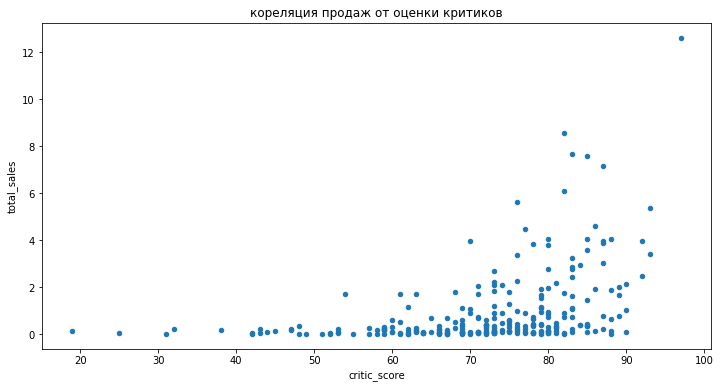

In [33]:
df_ps4 = df_ap[df_ap["platform"]=="PS4"]
df_ps4.plot(x='critic_score', y='total_sales', kind='scatter',figsize=(12,6), title="кореляция продаж от оценки критиков");

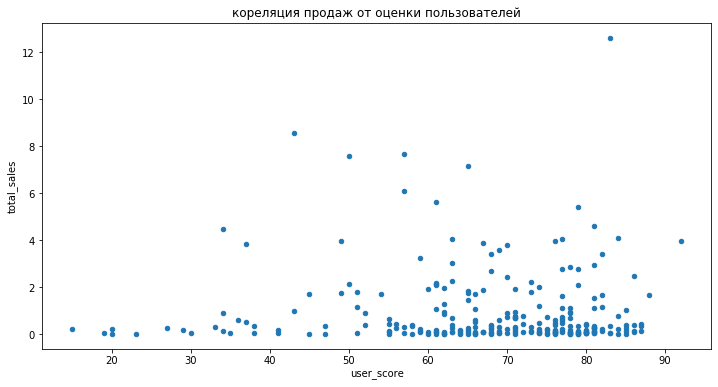

In [34]:
df_ps4.plot(x='user_score', y='total_sales', kind='scatter',figsize=(12,6), title="кореляция продаж от оценки пользователей");

In [35]:

df_ps4[['total_sales', 'critic_score','user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


На верхней диаграме рассеивания видна прямая кореляция продаж платформ PS4 от оценки критиков, что подтверждается расчетами (0.41), а вот с оценками от пользователей ее нет.

Сравним показатели с общими данными по отобранным нами платформам:

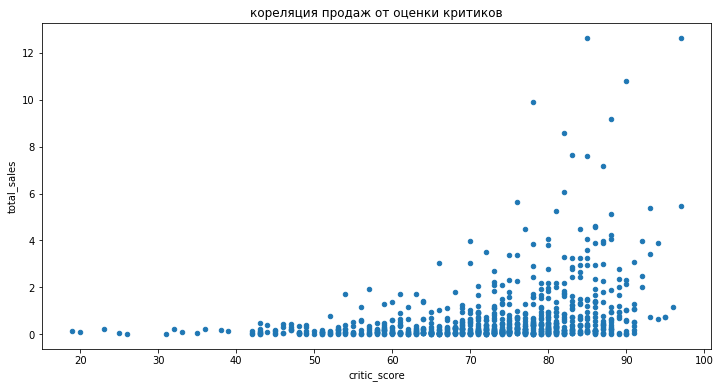

In [36]:
df_ap.plot(x='critic_score', y='total_sales', kind='scatter',figsize=(12,6), title="кореляция продаж от оценки критиков");

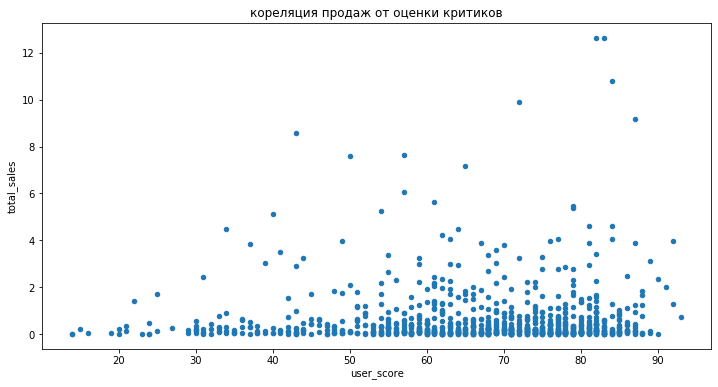

In [37]:
df_ap.plot(x='user_score', y='total_sales', kind='scatter',figsize=(12,6), title="кореляция продаж от оценки критиков");

In [38]:
df_ap[['total_sales', 'critic_score','user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.317145,0.040106
critic_score,0.317145,1.000000,0.499804
user_score,0.040106,0.499804,1.000000


Показатели по всем актуальным платформам подтверждают выводы, сделанные по PS4, разве что кореляция продаж от оценки критиков чуть менее выраженная (0.32). Значит оценка критиков влияет на продажи игр, тогда как оценка пользователей нет.

<a id='34'></a>
### Оценка продаж игр в зависимости от их жанра

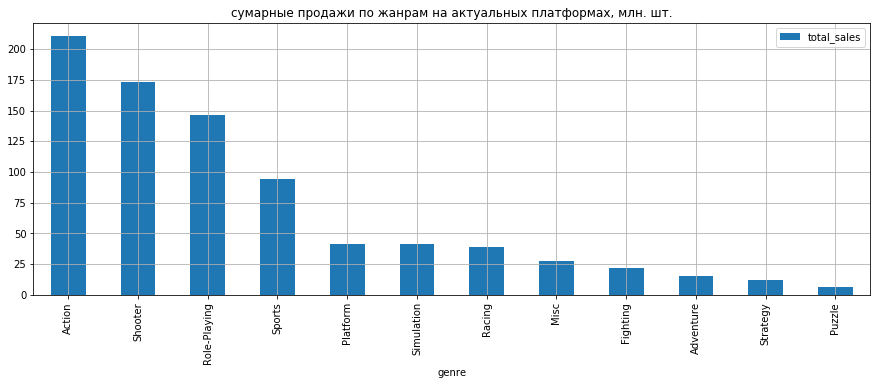

In [39]:
df_ap.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).plot(kind="bar", grid=True, figsize=(15, 5), title="сумарные продажи по жанрам на актуальных платформах, млн. шт.");

Наиболее прибыльным жанром является Action и Shooter. В целом высокие продажи имеют динамичные игры, тогда как игры с низкими продажими отличаются тем, что наоборот требуют времяни, внимания и вдумчивости.

<a id='35'></a>
### Вывод
- кол-во выпущенных игр росло до 2008 года, после чего начался спад
- лидерами продаж за весь наблюдаемый период являются платформы: PS2, X360, PS3, Wii, DS, PS
- средний период жизни платформ-лидеров 10 лет, половина из которых она растет, а половина падает
- платформы PS4 и XOne являются наиболее потенциально прибыльными платформами, они же являются лидерами продаж в 2016 году. При их релизе в 2013 году, можно ожидать от них роста еще пару лет.
- наибольшее падение продаж в последние годы показывают PS3 и X360, их 10-летний цикл существования видимо подходит к концу
- в качестве актуальных платформ для дальнейшего анализа определилили: PS4, XOne, 3DS, PC 
- этим платформам характерны большое кол-во игр с малыми продажами, но наличие выстрелевших игр значительно поднимают их продажи
- обнаружено зависивость продаж на платформах от оценки критиков и отсутствие зависимости от оценки пользователей
- высокие продажи имеют динамичные игры, низкими продажи у требущих много времени жанров

<a id='4'></a>
## Составление портрета пользователя каждого региона

<a id='41'></a>
### Самые популярные платформы

In [40]:
df_2010 = df[df["year_of_release"] >= 2010]
df_2010_platform = df_2010.pivot_table(index='platform', values=["na_sales", "eu_sales", "jp_sales", "other_sales", "total_sales"], aggfunc='sum').reset_index().sort_values(by='total_sales', ascending=False)
df_2010_platform["share_of_sales_na"] = round(df_2010_platform["na_sales"] / df_2010_platform["total_sales"], 2)
df_2010_platform["share_of_sales_eu"] = round(df_2010_platform["eu_sales"] / df_2010_platform["total_sales"], 2)
df_2010_platform["share_of_sales_jp"] = round(df_2010_platform["jp_sales"] / df_2010_platform["total_sales"], 2)
df_2010_platform["share_of_sales_other"] = round(df_2010_platform["other_sales"] / df_2010_platform["total_sales"], 2)
df_2010_platform

,platform,eu_sales,jp_sales,na_sales,other_sales,total_sales,share_of_sales_na,share_of_sales_eu,share_of_sales_jp,share_of_sales_other
4,PS3,213.60,59.26,229.25,85.63,587.74,0.39,0.36,0.10,0.15
10,X360,163.41,5.46,334.18,47.36,550.41,0.61,0.30,0.01,0.09
5,PS4,141.09,15.96,108.74,48.35,314.14,0.35,0.45,0.05,0.15
0,3DS,61.27,100.62,82.65,13.27,257.81,0.32,0.24,0.39,0.05
8,Wii,65.91,17.75,121.20,18.11,222.97,0.54,0.30,0.08,0.08
11,XOne,51.59,0.34,93.12,14.27,159.32,0.58,0.32,0.00,0.09
1,DS,28.06,27.90,59.66,8.13,123.75,0.48,0.23,0.23,0.07
2,PC,68.82,0.00,39.07,14.07,121.96,0.32,0.56,0.00,0.12
9,WiiU,25.13,13.01,38.10,5.95,82.19,0.46,0.31,0.16,0.07
6,PSP,7.59,42.20,9.65,4.61,64.05,0.15,0.12,0.66,0.07


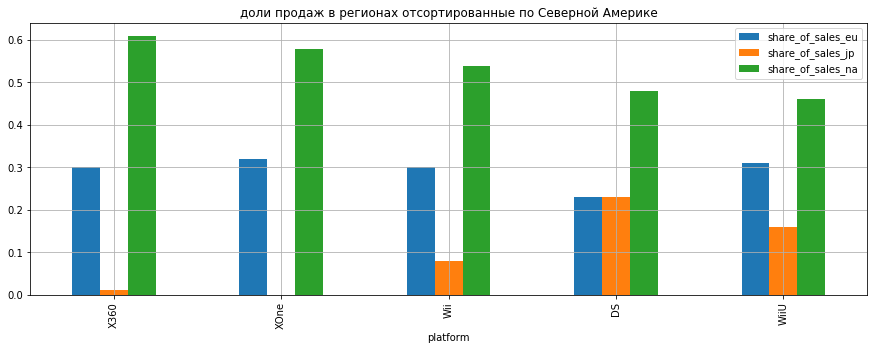

In [41]:
df_2010_platform.pivot_table(index='platform', values=["share_of_sales_na", "share_of_sales_eu", "share_of_sales_jp"], aggfunc='sum').sort_values(by='share_of_sales_na', ascending=False).head().plot(kind="bar", grid=True, figsize=(15, 5), title="доли продаж в регионах отсортированные по Северной Америке");

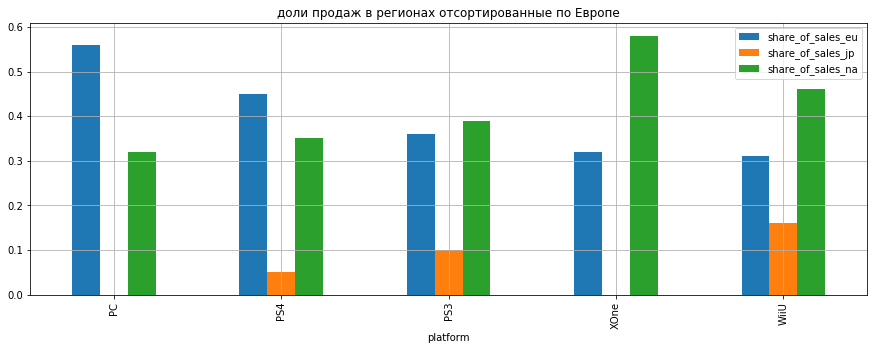

In [42]:
df_2010_platform.pivot_table(index='platform', values=["share_of_sales_na", "share_of_sales_eu", "share_of_sales_jp"], aggfunc='sum').sort_values(by='share_of_sales_eu', ascending=False).head().plot(kind="bar", grid=True, figsize=(15, 5), title="доли продаж в регионах отсортированные по Европе");

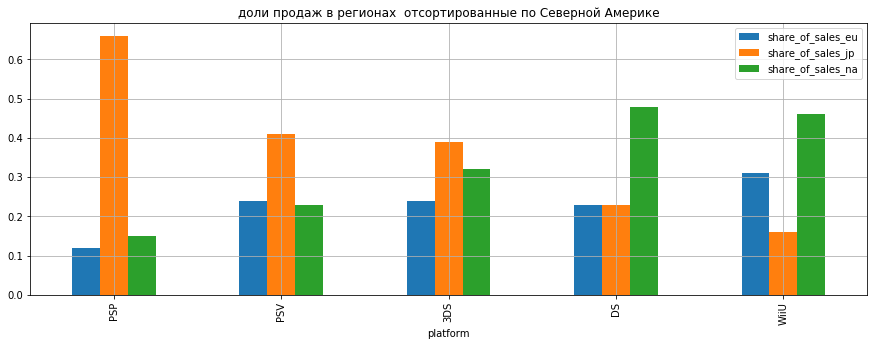

In [43]:
df_2010_platform.pivot_table(index='platform', values=["share_of_sales_na", "share_of_sales_eu", "share_of_sales_jp"], aggfunc='sum').sort_values(by='share_of_sales_jp', ascending=False).head().plot(kind="bar", grid=True, figsize=(15, 5), title="доли продаж в регионах  отсортированные по Северной Америке");

Видно, что популярные в Северной Америки платформы популярны и в Европе,  т.е. они занимают примерно одинаковые доли рынка. В Америки чуть более популярны платформы microsoft xbox, а в Европе платформы sony. Там же в ходу и игры на PC.
Но эти платформы не имеют популярности в Японии. И наоборот, самая популярная платформа в Японии (PSP) имеет малые доли в других регионах.

<a id='42'></a>
### Самые популярные жанры

In [44]:
df_2010_genre = df_2010.pivot_table(index='genre', values=["na_sales", "eu_sales", "jp_sales", "other_sales", "total_sales"], aggfunc='sum').reset_index().sort_values(by='total_sales', ascending=False)
df_2010_genre

,genre,eu_sales,jp_sales,na_sales,other_sales,total_sales
0,Action,233.63,72.20,290.64,76.62,673.09
8,Shooter,171.45,14.04,237.47,56.78,479.74
10,Sports,116.84,15.51,156.81,39.23,328.39
7,Role-Playing,75.48,103.54,112.05,24.21,315.28
3,Misc,66.09,24.29,123.80,20.38,234.56
6,Racing,54.75,6.68,46.11,15.14,122.68
4,Platform,38.30,15.81,54.90,10.71,119.72
2,Fighting,20.33,13.90,39.05,8.31,81.59
9,Simulation,26.39,13.30,26.39,5.67,71.75
1,Adventure,18.88,15.67,20.84,5.61,61.00


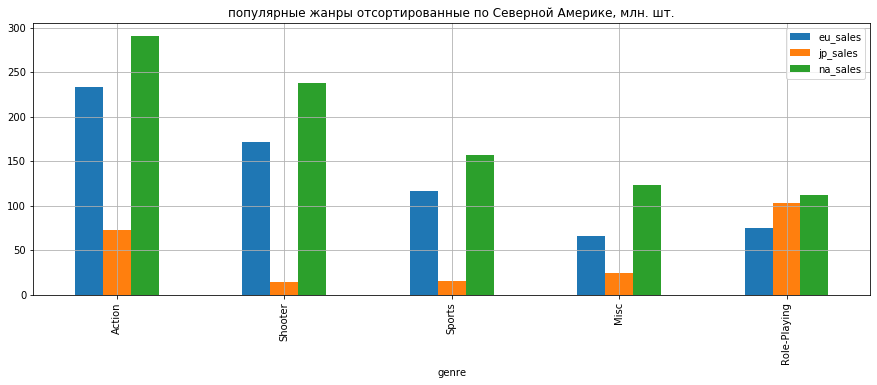

In [45]:
df_2010_genre.pivot_table(index='genre', values=["na_sales", "eu_sales", "jp_sales"], aggfunc='sum').sort_values(by='na_sales', ascending=False).head().plot(kind="bar", grid=True, figsize=(15, 5), title="популярные жанры отсортированные по Северной Америке, млн. шт.");

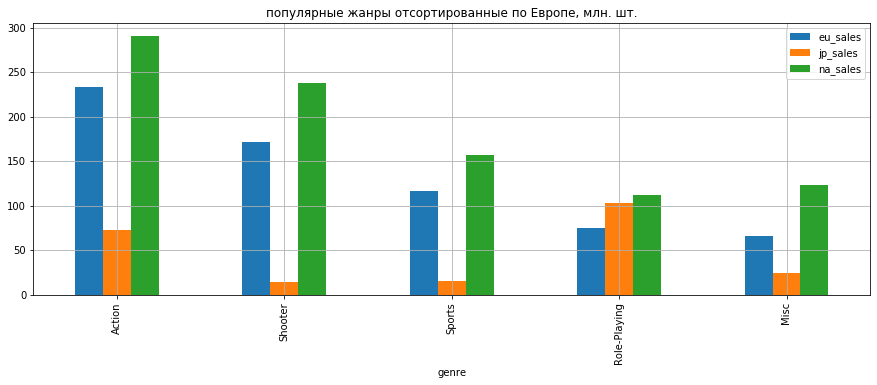

In [46]:
df_2010_genre.pivot_table(index='genre', values=["na_sales", "eu_sales", "jp_sales"], aggfunc='sum').sort_values(by='eu_sales', ascending=False).head().plot(kind="bar", grid=True, figsize=(15, 5), title="популярные жанры отсортированные по Европе, млн. шт.");

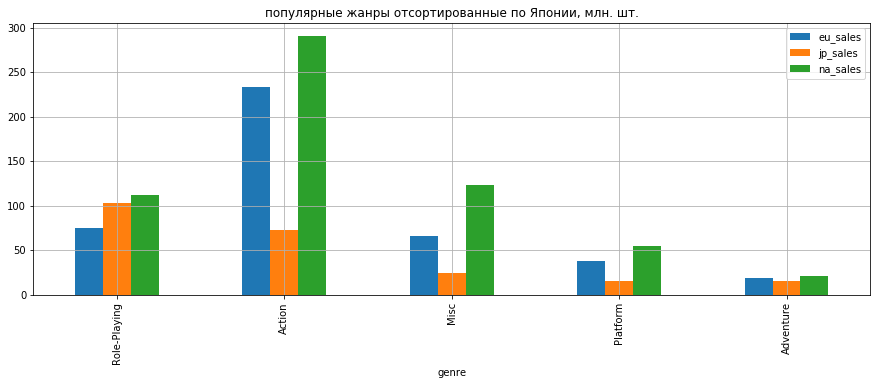

In [47]:
df_2010_genre.pivot_table(index='genre', values=["na_sales", "eu_sales", "jp_sales"], aggfunc='sum').sort_values(by='jp_sales', ascending=False).head().plot(kind="bar", grid=True, figsize=(15, 5), title="популярные жанры отсортированные по Японии, млн. шт.");

Видно, что популярные в Северной Америки жанры популярны и в Европе,  т.е. вкусы пользователей на этих рынках похожи. Есть некая схожесть и с Японским рынком, но там более популярны ролевые жанры и приключения, а спортивные и шутеры, популярные в Европе и Америке не входят в топ 5. 

<a id='43'></a>
### Влияние рейтинга ESRB на продажи в регионах

«EC» («Early childhood») — «Для детей младшего возраста»

«E» («Everyone») — «Для всех»

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

«T» («Teen») — «Подросткам»

«M» («Mature») — «Для взрослых»

RP — (Rating Pending) «В ожидании рейтинга»

In [48]:
df_2010_ersb = df_2010.pivot_table(index='rating', values=["na_sales", "eu_sales", "jp_sales", "other_sales", "total_sales"], aggfunc='sum').reset_index().sort_values(by='total_sales', ascending=False)
df_2010_ersb 

,rating,eu_sales,jp_sales,na_sales,other_sales,total_sales
3,M,292.04,30.45,382.22,96.98,801.69
0,E,197.34,47.87,271.15,60.04,576.40
4,RP,139.47,171.49,155.72,40.52,507.20
5,T,113.08,42.11,160.81,38.72,354.72
1,E10+,99.28,13.22,159.38,31.15,303.03
2,EC,0.00,0.00,1.13,0.07,1.20


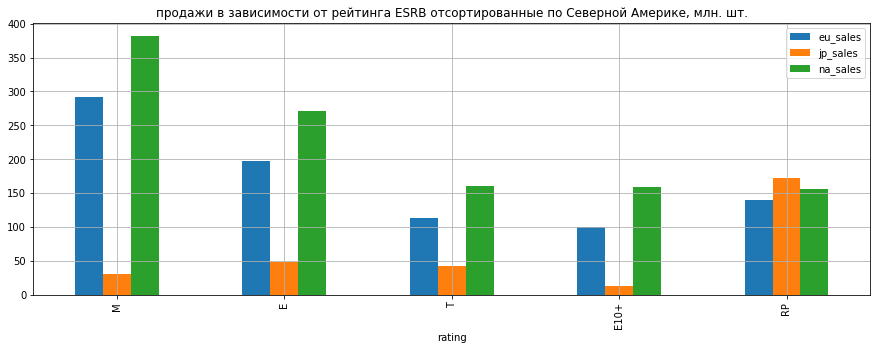

In [49]:
df_2010_ersb .pivot_table(index='rating', values=["na_sales", "eu_sales", "jp_sales"], aggfunc='sum').sort_values(by='na_sales', ascending=False).head().plot(kind="bar", grid=True, figsize=(15, 5), title="продажи в зависимости от рейтинга ESRB отсортированные по Северной Америке, млн. шт.");

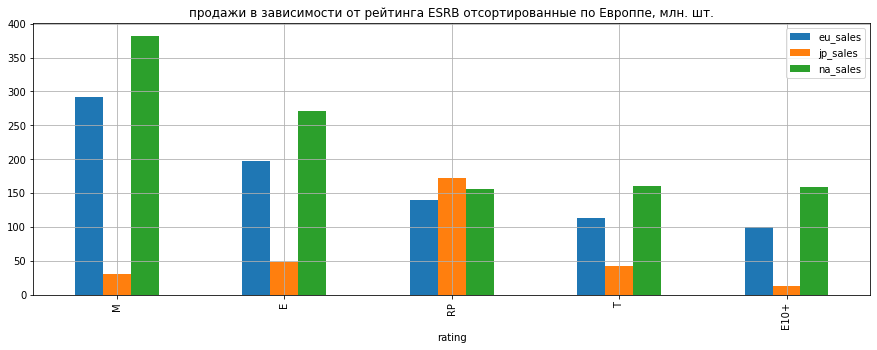

In [50]:
df_2010_ersb .pivot_table(index='rating', values=["na_sales", "eu_sales", "jp_sales"], aggfunc='sum').sort_values(by='eu_sales', ascending=False).head().plot(kind="bar", grid=True, figsize=(15, 5), title="продажи в зависимости от рейтинга ESRB отсортированные по Европпе, млн. шт.");

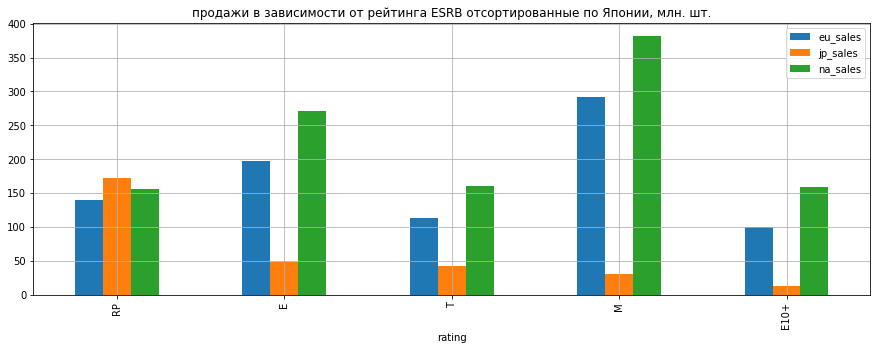

In [51]:
df_2010_ersb .pivot_table(index='rating', values=["na_sales", "eu_sales", "jp_sales"], aggfunc='sum').sort_values(by='jp_sales', ascending=False).head().plot(kind="bar", grid=True, figsize=(15, 5), title="продажи в зависимости от рейтинга ESRB отсортированные по Японии, млн. шт.");

Наибольшее распространение в мире в целом получили игры для взрослых, а по мере его изменения в сторону младших возрастов уменьшаются и их продажи. Это удтверждение справедливо как для Европпы, так и для Северной Америки. В Японии же на первом месте игры не имеющих категории, потом для всех, для подростков и только на 4 месте для взрослых. Этом можно объяснить либо тем, что взрослые в Японии меньше играют, либо там действительно строго соблюдают рейтинг ESRB  при покупках, тогда как в мире на него меньше обращают внимание.

<a id='44'></a>
### Вывод
Портрет пользователя Северной Америки:
- предпочитает платформы серии microsoft Xbox 
- любит динамичные жанры: шутеры, спортивные, предназначенные для взрослых пользователей.

Портрет пользователя Европы:
- предпочитает платформы серии sony PS 
- любит динамичные жанры: шутеры, спортивные, предназначенные для взрослых пользователей.

Портрет пользователя Японии:
- предпочитает платформы серии PSP 
- любит жанры: ролевые, приключения, предназначенные для всех возрастов, включая подростков пользователей.

<a id='5'></a>
## Проверка гипотез

<a id='51'></a>
### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H0 - cредние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1 - cредние пользовательские рейтинги платформ Xbox One и PC различаются

In [52]:
xone = df_2010[df_2010['platform']=='XOne']['user_score'].dropna()
len(xone)

182

In [53]:
pc = df_2010[df_2010['platform']=='PC']['user_score'].dropna()
len(pc)

374

In [54]:
xone.describe()

count    182.000000
mean      65.214286
std       13.809406
min       16.000000
25%       58.000000
50%       68.000000
75%       75.000000
max       92.000000
Name: user_score, dtype: float64

In [55]:
pc.describe()

count    374.000000
mean      65.181818
std       15.653901
min       14.000000
25%       56.000000
50%       68.000000
75%       77.000000
max       93.000000
Name: user_score, dtype: float64

Совокупности не зависимые,  поэтому применим t-тест, однако размер выборок разный, а значит укажем параметр equal_var=False (разность дисперсии), уровене статистической значимости будем считать 0.05

In [56]:
alpha = 0.05

results = st.ttest_ind(xone, pc, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.9801634129117981
Не получилось отвергнуть нулевую гипотезу


Применив t-тест при критическом уровене статистической значимости в 0.05, приходим к выводу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

<a id='52'></a>
### Средние пользовательские рейтинги жанров Action и Sports разные

Н0 - Средние пользовательские рейтинги жанров Action и Sports одинаковые

Н1 - Средние пользовательские рейтинги жанров Action и Sports различаются

In [57]:
action = df_2010[df_2010['genre']=='Action']['user_score'].dropna()
len(action)

779

In [58]:
sports = df_2010[df_2010['genre']=='Sports']['user_score'].dropna()
len(sports)

315

In [59]:
action.describe()

count    779.000000
mean      67.818999
std       13.602013
min       16.000000
25%       60.000000
50%       71.000000
75%       78.000000
max       91.000000
Name: user_score, dtype: float64

In [60]:
sports.describe()

count    315.000000
mean      59.015873
std       16.839342
min        2.000000
25%       50.000000
50%       62.000000
75%       72.000000
max       90.000000
Name: user_score, dtype: float64

Совокупности не зависимые,  поэтому применим t-тест, однако размер выборок разный, а значит укажем параметр equal_var=False (разность дисперсии), уровене статистической значимости будем считать 0.05

In [61]:
alpha = 0.05

results = st.ttest_ind(action, sports, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4516152467844724e-15
Отвергаем нулевую гипотезу


Применив t-тест при критическом уровене статистической значимости в 0.05, приходим к выводу, что cредние пользовательские рейтинги жанров Action и Sports разные.

<a id='53'></a>
### Вывод

Проверив гипотезы приходим к выводу, что:
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- cредние пользовательские рейтинги жанров Action и Sports разные

<a id='6'></a>
## Общий вывод

На этапе предобработки мы заменили в user_score значения 'tbd' на NaN и нормализовали его по отношению к critic_Score, 
преобразовали данные в целочисленный тип в столбцах рейтинга и года релиза, перевели в колонке rating значения K-A в E, обработали пропуски, удалив при этом строки с пропуском в колонках name и year_of_release, что в сумме менее 2% данных, а также создали столбец total_sales с суммарными продажами во всех регионах.

Проведя анализ данных, можно отметить, что:
- кол-во выпущенных игр росло до 2008 года, после чего начался спад
- лидерами продаж за весь наблюдаемый период являются платформы: PS2, X360, PS3, Wii, DS, PS
- средний период жизни платформ-лидеров 10 лет, половина из которых она растет, а половина падает, что подтверждают показатели PS3 и X360, допусившие наибольшее падение продаж в последние годы, будучи лидерами еще 5 лет назад
- платформы PS4 и XOne являясь лидерами продаж в 2016 году, имеют наибольший потенциал и в дальнейшем наращивать продажи.
- наибольшее падение продаж в последние годы показывают PS3 и X360, их 10-летний цикл существования видимо подходит к концу
- в качестве актуальных платформ для дальнейшего анализа мы определилили: PS4, XOne, 3DS, PC
- обнаружили зависивость продаж на платформах от оценки критиков и отсутствие зависимости от оценки пользователей
- высокие продажи имеют динамичные игры и наоборот низкие - долгие.

Проверив гипотезы мы пришли к выводу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а cредние пользовательские рейтинги жанров Action и Sports разные.

Проанализировав пользователей, мы пришли к выводу, что в стратегии дальнейших продаж необходимо ориентироваться на рейтинги критиков и иметь ввиду региональные предпочтения пользователей:
- И в Америки и в Европпе в целом любят шутеры, спортивные и др. динамичные игры для всех возрастов, но немного отличаются предпочитаемые ими платформы, в Америке в лидерах и имеющий тренд к росту XOne, в Европе PS4.
- В Японии же вкусы отличаются, любят жанры приключений и ролевых игр, и предпочитают PSP. Нужно иметь ввиду, что это платформа на рынке более 10 лет и имеет тенденцию к снижению. Дополнительно следует учитывать, что маркировка игр для взрослых в Японии снижает потенциал продаж. 
